# Homework 4: Can you predict the Midterm Elections?

Due: Monday, November 3, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW4.ipynb download=HW4.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work. For the competition (problem 4), we will post a link on Piazza to a Google Form for you to submit your predictions. 


---


## Introduction

**Add Introduction**

You will use the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to extract the polls for the current 2014 Senate Midterm Elections and provide a final prediction of the result of each state.

#### Data

We will use the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api). 

---

In [229]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)
rcParams['figure.dpi'] = 96

## Problem 1: Data Wrangling

We will read in the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) and create a dictionary of DataFrames as well a master table information for each race.

#### Problem 1(a)

Read in [this JSON object](http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate) containing the polls for the 2014 Senate Elections using the HuffPost API. Call this JSON object `info`.  This JSON object is imported as a list in Python where each element contains the information for one race.  Use the function `type` to confirm the that `info` is a list. 

In [59]:
### Your code here ###
import requests
info = requests.get("http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate").json()
type(info)

list

In [60]:
info[0]

{'election_date': '2014-11-04',
 'estimates': [{'choice': 'Coons',
   'first_name': 'Chris',
   'incumbent': True,
   'last_name': 'Coons',
   'lead_confidence': 99.9,
   'party': 'Dem',
   'value': 56.0},
  {'choice': 'Wade',
   'first_name': 'Kevin',
   'incumbent': False,
   'last_name': 'Wade',
   'lead_confidence': 0.0,
   'party': 'Rep',
   'value': 34.0}],
 'id': 571,
 'last_updated': '2016-06-06T14:37:54.000Z',
 'poll_count': 5,
 'short_title': '2014 Delaware Senate: Wade vs. Coons',
 'slug': '2014-delaware-senate-wade-vs-coons',
 'state': 'DE',
 'title': '2014 Delaware Senate: Wade vs. Coons',
 'topic': '2014-senate',
 'url': 'http://elections.huffingtonpost.com/pollster/2014-delaware-senate-wade-vs-coons'}

#### Problem 1(b)

For each element of the list in `info` extract the state. We should have one poll per state, but we do not. Why?

**Hint**: Use the internet to find out information on the races in each state that has more than one entry. Eliminate entries of the list that represent races that are not happening.

In [61]:
### Your code here ###
import re
import numpy as np
import pandas as pd
# re.search(r'2014 (.*) Senate', item['title']).group(1)
titles = np.array([item['title'] for item in info])
states = np.array([re.search(r'2014 (.*) Senate', item['title']).group(1) for item in info])
titles = pd.Series(titles)
states = pd.Series(states)
polls_count = pd.value_counts(states)

In [62]:
titles[states.map(lambda state: polls_count[state] > 1)]

4          2014 Oklahoma Senate: Lankford vs. Johnson
12       2014 Oklahoma Senate: Inhofe vs. Silverstein
13    2014 South Carolina Senate: Scott vs. Dickerson
14       2014 South Carolina Senate: Graham vs. Hutto
29        2014 New Hampshire Senate: Bass vs. Shaheen
31       2014 New Hampshire Senate: Brown vs. Shaheen
dtype: object

In [66]:
info_cleaned = [item for index, item in enumerate(info) if index != 29]
pd.value_counts([re.search(r'2014 (.*) Senate', item['title']).group(1) for item in info_cleaned])

Oklahoma          2
South Carolina    2
Massachusetts     1
North Carolina    1
West Virginia     1
Iowa              1
Georgia           1
Arkansas          1
Mississippi       1
New Hampshire     1
Kentucky          1
Michigan          1
Colorado          1
Oregon            1
Louisiana         1
South Dakota      1
Texas             1
Delaware          1
Nebraska          1
Kansas            1
Wyoming           1
New Jersey        1
Maine             1
Idaho             1
Minnesota         1
Illinois          1
Alaska            1
Tennessee         1
Montana           1
Hawaii            1
New Mexico        1
Virginia          1
Rhode Island      1
dtype: int64

** Your answer here: **

#### Problem 1(c)

Create a dictionary of pandas DataFrames called `polls` keyed by the name of the election (a string). Each value in the dictionary should contain the polls for one of the races.

In [89]:
### Your code here ###
polls = {item['title']: pd.read_csv(item['url'] + '.csv') for item in info_cleaned}
polls['2014 Alaska Senate: Sullivan vs. Begich']

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Begich,Sullivan,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2014-11-01,2014-11-02,2014-11-03T12:13:22Z,1052,Likely Voters,IVR/Online,45.0,46.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2014/PP...,Pollster,Dem,NaN,1
1,Rasmussen,2014-10-27,2014-10-30,2014-10-31T22:16:55Z,887,Likely Voters,IVR/Online,42.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
2,Moore (R-Sullivan For U.S. Senate),2014-10-26,2014-10-28,2014-10-29T22:53:09Z,500,Likely Voters,Live Phone,38.0,42.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://thehill.com/blogs/ballot-box/senate-rac...,Sponsor,Rep,NaN,1
3,Ivan Moore,2014-10-24,2014-10-26,2014-10-28T11:12:37Z,544,Likely Voters,Live Phone,48.0,42.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://www.facebook.com/ivan.moore.58/posts/1...,Pollster,Dem,NaN,1
4,CBS/NYT/YouGov,2014-10-16,2014-10-23,2014-10-26T14:47:01Z,561,Likely Voters,Internet,44.0,48.0,9.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2014/09/07/2014-...,Nonpartisan,None,NaN,1
5,Harstad (D-Senate Majority PAC/Put Alaska First),2014-10-18,2014-10-22,2014-10-24T16:59:52Z,700,Likely Voters,Live Phone,44.0,44.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.senatemajority.com/wpress/wp-conten...,Sponsor,Dem,NaN,1
6,Hellenthal,2014-10-15,2014-10-21,2014-10-24T22:16:34Z,403,Likely Voters,Live Phone,49.0,39.0,6.0,http://elections.huffingtonpost.com/pollster/p...,https://www.scribd.com/doc/244305469/AK-Sen-AK...,Pollster,Other,NaN,1
7,Rasmussen,2014-10-08,2014-10-12,2014-10-14T22:21:17Z,700,Likely Voters,IVR/Online,45.0,48.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
8,FOX,2014-10-04,2014-10-07,2014-10-08T22:17:05Z,706,Likely Voters,Live Phone,40.0,44.0,10.0,http://elections.huffingtonpost.com/pollster/p...,http://www.foxnews.com/politics/interactive/20...,Nonpartisan,None,NaN,1
9,CNN,2014-10-01,2014-10-06,2014-10-09T12:25:50Z,704,Likely Voters,Live Phone,44.0,50.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://i2.cdn.turner.com/cnn/2014/images/10/08...,Nonpartisan,None,NaN,1


#### Problem 1(d)

Now create a master table information containing information about each race. Create a pandas DataFrame called `candidates` with rows containing information about each race. The `candidates` DataFrame should have the following columns: 

1. `State` = the state where the race is being held
2. `R` = name of republican candidate
3. `D` = name of non-republican candidate (Democrate or Independent) 
4. `incumbent` = R, D or NA

**Hint**: You will need a considerable amount of data wrangling for this.

In [110]:
info_cleaned[2]

{'election_date': '2014-11-04',
 'estimates': [],
 'id': 569,
 'last_updated': '2016-06-06T14:37:55.000Z',
 'poll_count': 4,
 'short_title': '2014 Rhode Island Senate: Zaccaria vs. Reed',
 'slug': '2014-rhode-island-senate-zaccaria-vs-reed',
 'state': 'RI',
 'title': '2014 Rhode Island Senate: Zaccaria vs. Reed',
 'topic': '2014-senate',
 'url': 'http://elections.huffingtonpost.com/pollster/2014-rhode-island-senate-zaccaria-vs-reed'}

In [122]:
re.search(r'(\w+) vs. (\w+)', info_cleaned[29]['title'])

<_sre.SRE_Match object; span=(27, 45), match='Capito vs. Tennant'>

In [124]:
### Your code here ###
def make_row(item):
    incumbent = np.nan
    if len(item['estimates']) == 0:
        r = re.search(r'(\w+) vs. (\w+)', item['title'])
        R, D = r.group(1), r.group(2)
    else:
        for candidate in item['estimates'][:2]:
            if candidate['party'] == 'Rep':
                R = candidate['last_name'].split(" ")[-1]
            else:
                D = candidate['last_name']
            if candidate['incumbent']:
                incumbent = candidate['party']
    return {'State': item['state'], 'R': R, 'D': D, 'incumbent': incumbent}

candidates = pd.DataFrame([make_row(item) for item in info_cleaned])
candidates

,D,R,State,incumbent
0,Coons,Wade,DE,Dem
1,Markey,Herr,MA,Dem
2,Reed,Zaccaria,RI,NaN
3,Curtis,Daines,MT,NaN
4,Johnson,Lankford,OK,NaN
5,Schatz,Cavasso,HI,Dem
6,Orman,Roberts,KS,Rep
7,Hardy,Enzi,WY,Rep
8,Ball,Alexander,TN,Rep
9,Mitchell,Risch,ID,Rep


## Problem 2: Confidence Intervals

Compute a 99% confidence interval for each state. 

#### Problem 2(a)

Assume you have $M$ polls with sample sizes $n_1, \dots, n_M$. If the polls are independent, what is the average of the variances of each poll if the true proportion is $p$?

** Your answer here: **

Variance of each poll is
$$Var(X_i) = \frac{p(1-p)}{n_i}$$
Average of the variances is
$$\frac{1}{M}\sum_{i=1}^{M} Var(X_i) = \frac{1}{M} p(1-p) \sum_{i=1}^{M} \frac{1}{n_i}$$

#### Problem 2(b)

Compute the square root of these values in Problem 2(a) for the republican candidates in each race. Then, compute the standard deviations of the observed poll results for each race. 

In [182]:
polls['2014 Alaska Senate: Sullivan vs. Begich']

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Begich,Sullivan,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2014-11-01,2014-11-02,2014-11-03T12:13:22Z,1052,Likely Voters,IVR/Online,45.0,46.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2014/PP...,Pollster,Dem,NaN,1
1,Rasmussen,2014-10-27,2014-10-30,2014-10-31T22:16:55Z,887,Likely Voters,IVR/Online,42.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
2,Moore (R-Sullivan For U.S. Senate),2014-10-26,2014-10-28,2014-10-29T22:53:09Z,500,Likely Voters,Live Phone,38.0,42.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://thehill.com/blogs/ballot-box/senate-rac...,Sponsor,Rep,NaN,1
3,Ivan Moore,2014-10-24,2014-10-26,2014-10-28T11:12:37Z,544,Likely Voters,Live Phone,48.0,42.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://www.facebook.com/ivan.moore.58/posts/1...,Pollster,Dem,NaN,1
4,CBS/NYT/YouGov,2014-10-16,2014-10-23,2014-10-26T14:47:01Z,561,Likely Voters,Internet,44.0,48.0,9.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2014/09/07/2014-...,Nonpartisan,None,NaN,1
5,Harstad (D-Senate Majority PAC/Put Alaska First),2014-10-18,2014-10-22,2014-10-24T16:59:52Z,700,Likely Voters,Live Phone,44.0,44.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.senatemajority.com/wpress/wp-conten...,Sponsor,Dem,NaN,1
6,Hellenthal,2014-10-15,2014-10-21,2014-10-24T22:16:34Z,403,Likely Voters,Live Phone,49.0,39.0,6.0,http://elections.huffingtonpost.com/pollster/p...,https://www.scribd.com/doc/244305469/AK-Sen-AK...,Pollster,Other,NaN,1
7,Rasmussen,2014-10-08,2014-10-12,2014-10-14T22:21:17Z,700,Likely Voters,IVR/Online,45.0,48.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
8,FOX,2014-10-04,2014-10-07,2014-10-08T22:17:05Z,706,Likely Voters,Live Phone,40.0,44.0,10.0,http://elections.huffingtonpost.com/pollster/p...,http://www.foxnews.com/politics/interactive/20...,Nonpartisan,None,NaN,1
9,CNN,2014-10-01,2014-10-06,2014-10-09T12:25:50Z,704,Likely Voters,Live Phone,44.0,50.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://i2.cdn.turner.com/cnn/2014/images/10/08...,Nonpartisan,None,NaN,1


In [214]:
### Your code here ###
from datetime import datetime
def compute_sds(item, name, n_days=None):
    df = polls[item['title']]
    
    if n_days:
        df = df[df['End Date'].map(lambda date: (datetime(2014, 10, 22) - datetime.strptime(date, '%Y-%m-%d')).days <= n_days)]
    
    ps = df[name] / 100
    p_mean = ps.mean()
    theoretical_sd = np.sqrt(p_mean * (1 - p_mean) * np.mean(1 / df['Number of Observations']))
    observed_sd = np.std(ps)
    n_polls = df.shape[0]
    return theoretical_sd, observed_sd, n_polls
    
theoretical_sds, observed_sds, n_polls = zip(*[compute_sds(item, candidates.iloc[i].R) for i, item in enumerate(info_cleaned)])

#### Problem 2(c) 

Plot observed versus theoretical (average of the theoretical SDs) with the area of the point proportional to number of polls. How do these compare?

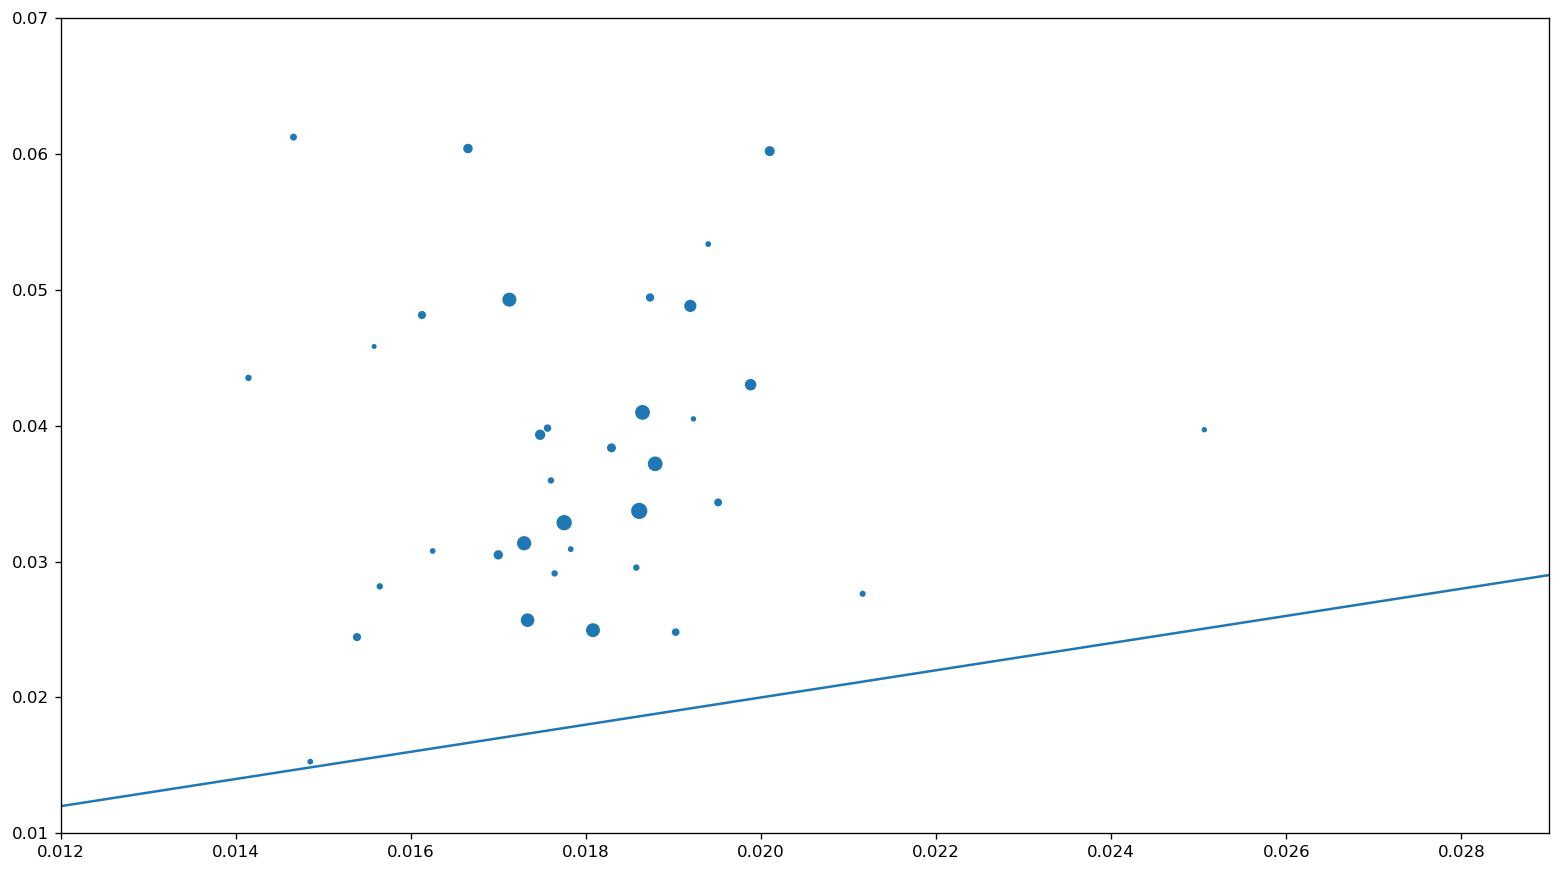

In [233]:
### Your code here ###
import matplotlib.pyplot as plt
import seaborn
plt.scatter(theoretical_sds, observed_sds, s=n_polls)
plt.plot((0, 1), (0, 1))
plt.xlim((.012, .029))
plt.ylim((.01, .07))
plt.show()

** Your answer here: **

#### Problem 2(d)

Repeat Problem 2(c) but include only the most recent polls from the last two months. Do they match better or worse or the same? Can we just trust the theoretical values?

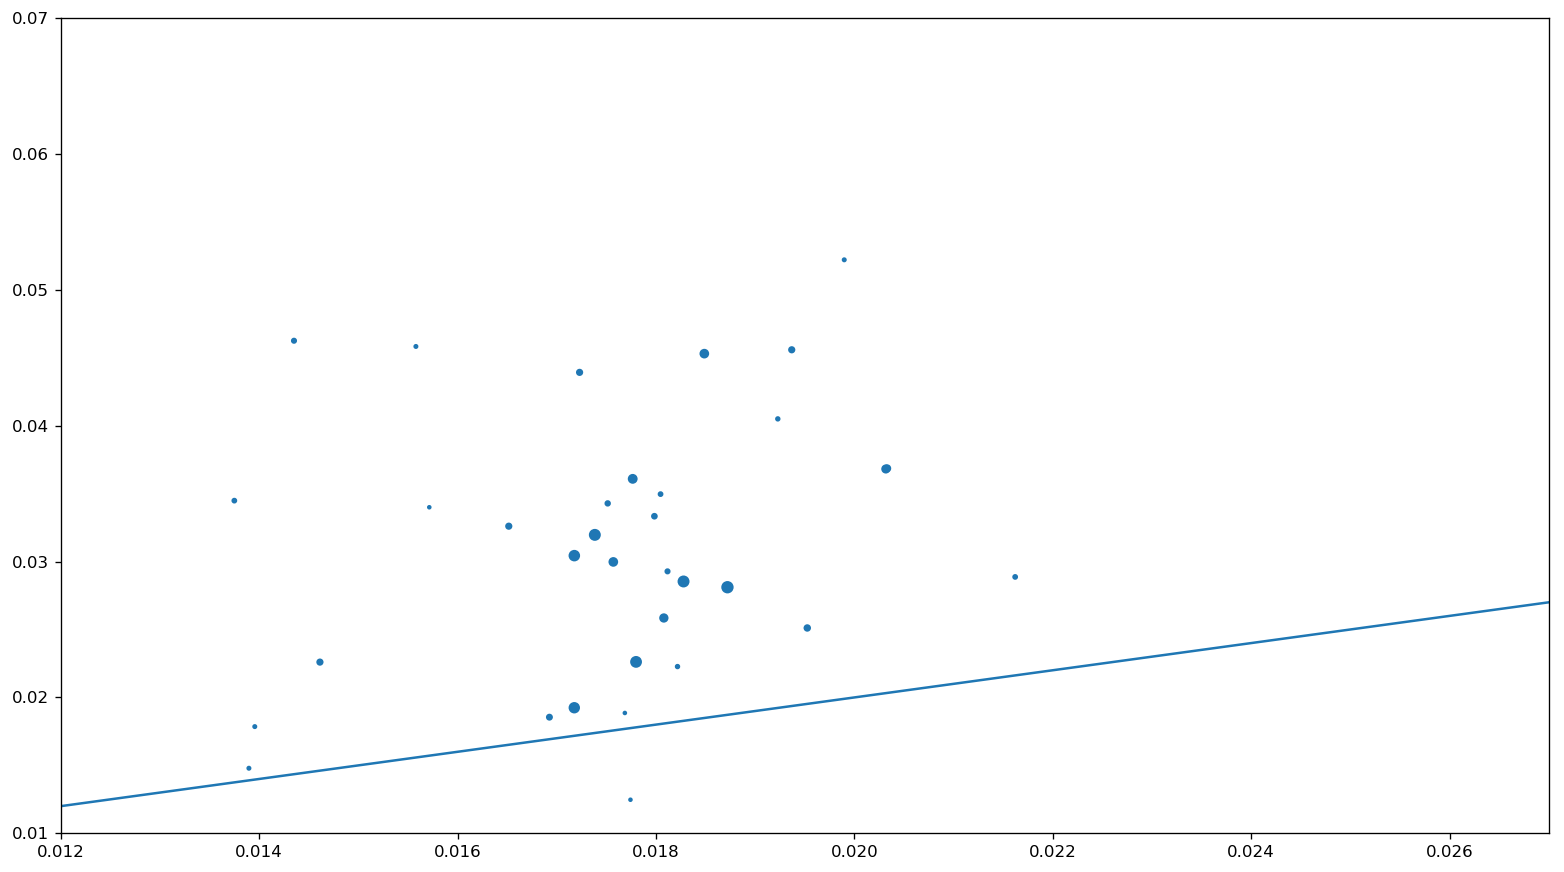

In [234]:
### Your code here ###
plt.scatter(*zip(*[compute_sds(item, candidates.iloc[i].R, 60) for i, item in enumerate(info_cleaned)]))
plt.plot((0, 1), (0, 1))
plt.xlim((.012, .027))
plt.ylim((.01, .07))
plt.show()

** Your answer here: **

#### Problem 2(e)

Create a scatter plot with each point representing one state. Is there one or more races that are outlier in that it they have much larger variabilities than expected ? Explore the original poll data and explain why the discrepancy?

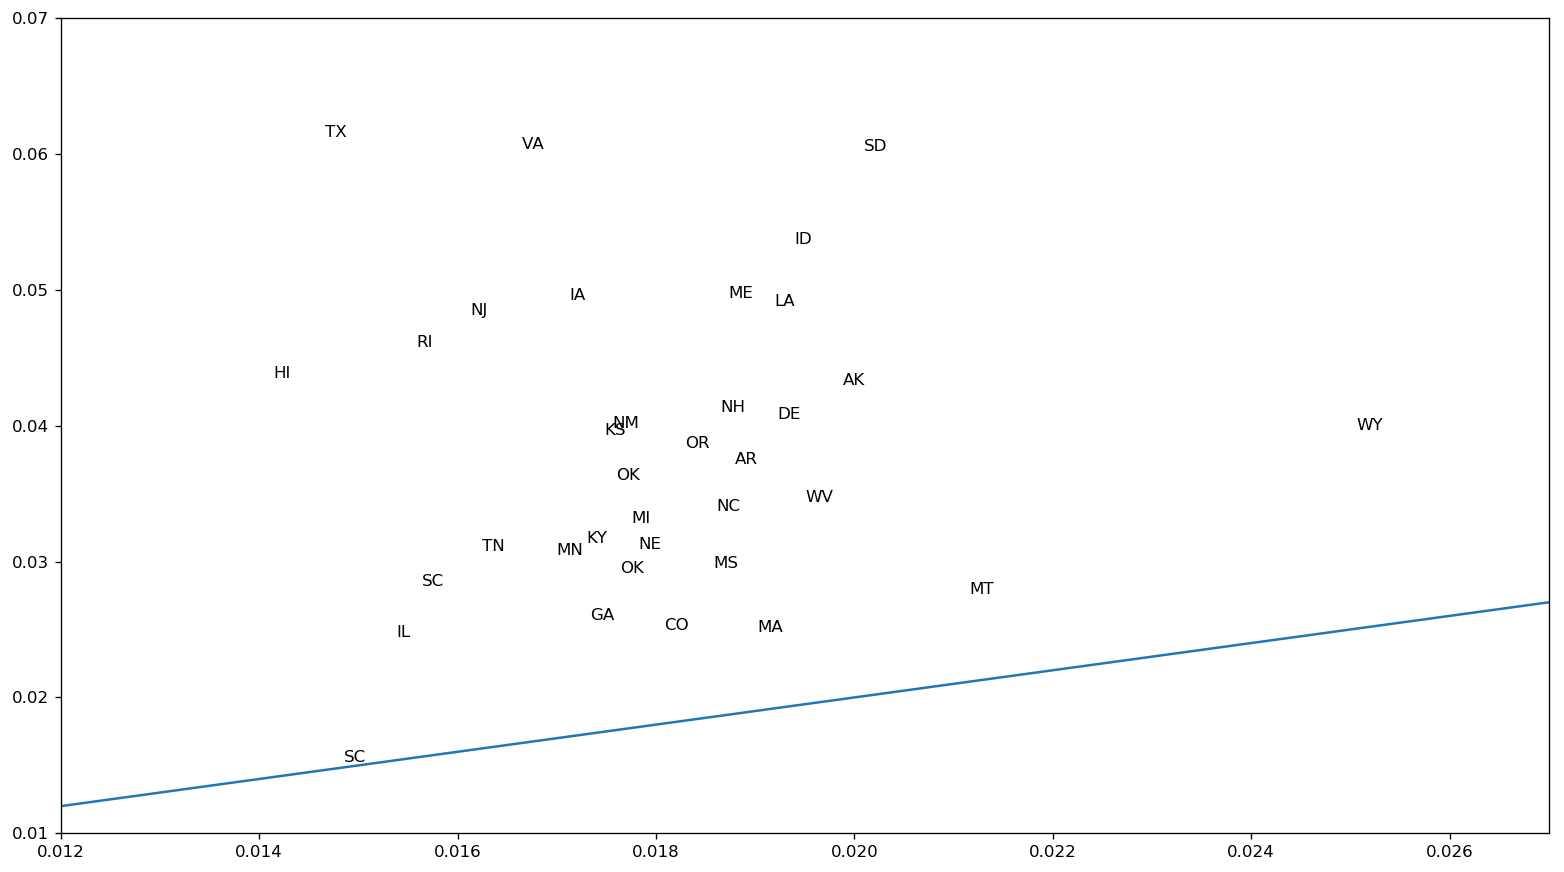

In [235]:
### Your code here ###
for i in range(len(candidates)):
    plt.text(theoretical_sds[i], observed_sds[i], candidates.iloc[i].State)
plt.plot((0, 1), (0, 1))
plt.xlim((.012, .027))
plt.ylim((.01, .07))
plt.show()

** Your answer here: **

#### Problem 2(f)

Construct confidence intervals for the difference in each race. Use either theoretical or data driven estimates of the standard error depending on your answer to this question. Use the results in Problem 2(e), to justify your choice.


In [ ]:
### Your code here ###

# Problem 3: Prediction and Posterior Probabilities

Perform a Bayesian analysis to predict the probability of Republicans winning in each state then provide a posterior distribution of the number of republicans in the senate.

#### Problem 3(a)

First, we define a Bayesian model for each race. The prior for the difference $\theta$ between republicans and democtrats will be $N(\mu,\tau^2)$. Say before seeing poll data you have no idea who is going to win, what should $\mu$ be? How about $\tau$, should it be large or small? 

** Your answer here: **

#### Problem 3(b)

What is the distribution of $d$ conditioned on $\theta$. What is the posterior distribution of $\theta | d$? 

**Hint**: Use normal approximation. 

**Your answer here:**

#### Problem 3(c)

The prior represents what we think before hand. We do not know who is expected to win, so we assume $\mu=0$. For this problem estimate $\tau$ using the observed differences across states (Hint: $\tau$ represents the standard deviation of a typical difference). Compute the posterior mean for each state and plot it against original average. Is there much change? Why or why not? 

In [ ]:
### Your code here ###

**Your answer here:**

#### Problem 3(d)

For each state, report a probabilty of Republicans winning. How does your answer here compare to the other aggregators?

In [ ]:
### Your code here ###

**Your answer here:**

#### Problem 3(e)

Use the posterior distributions in a Monte Carlo simulation to generate election results. In each simulation compute the total number of seats the Republican control. Show a histogram of these results.

In [ ]:
### Your code here ###

## Problem 4

Predict the results for the 2014 Midterm Elections. We will have a three competitions with the terms for scoring entries described above. For both questions below, **explain** or provide commentary on how you arrived at your predictions including code. 

**Hint**: Use election results from 2010, 2012 to build and test models.

#### Problem 4(a)

Predict the number of Republican senators. You may provide an interval. Smallest interval that includes the election day result wins. 

**Note**: we want the total so add the numbers of those that are not up for election.

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

#### Problem 4(b)

Predict the R-D difference in each state. The predictions that minimize the residual sum of squares between predicted and observed differences wins.

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

#### Problem 4(c)

Report a confidence interval for the R-D difference in each state. If the election day result falls outside your confidence interval in more than two states you are eliminated. For those surviving this cutoff, we will add up the size of all confidence intervals and sum. The smallest total length of confidence interval wins. 

**Note**: you can use Bayesian credible intervals or whatever else you want. 

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
